In [1]:
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Polygon, Point, MultiPolygon
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas as gpd
# import contextily as cx
from tqdm import tqdm
import json


In [2]:
import utilities

In [34]:
data_building_fp=utilities.building_footprint_extract(x=-73.590266,y=45.519742, r=0.02)
data_building_fp.head()

Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 14119 buildings in 2222 m radius of point -73.590266,45.519742


bldg_category                                    bldg_id  \
0      Régulier  uuid_296f31f0-c218-4b3e-8f9e-32b8c28061fc   
1      Régulier  uuid_6ac51d4a-61c9-49ff-a930-6c2d07c4743b   
2      Régulier  uuid_4c0dd4f1-8afc-4d70-a54d-c3c11ce3c1b0   
3      Régulier  uuid_038969f2-aca7-41e3-9970-3fa50af9688f   
4      Régulier  uuid_79d1be29-321c-4801-b764-9d645f26ab60   

                   bldg_name                          bldg_orig_id  \
0  Rosemont-La-Petite-Patrie  296f31f0-c218-4b3e-8f9e-32b8c28061fc   
1  Rosemont-La-Petite-Patrie  6ac51d4a-61c9-49ff-a930-6c2d07c4743b   
2  Rosemont-La-Petite-Patrie  4c0dd4f1-8afc-4d70-a54d-c3c11ce3c1b0   
3  Rosemont-La-Petite-Patrie  038969f2-aca7-41e3-9970-3fa50af9688f   
4  Rosemont-La-Petite-Patrie  79d1be29-321c-4801-b764-9d645f26ab60   

   built_year   fid                                               geom  \
0        1910  2920  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
1           0  4081  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
2        1960  5254  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
3        1923  6778  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
4        1929  7624  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   

  gml_lod  height_max  height_mean  index  \
0    LoD1          13    66.835462   2920   
1    LoD1          10    64.224258   4079   
2    LoD1           9    65.570888   5252   
3    LoD1           8    64.929238   6775   
4    LoD1           8    65.686680   7619   

                             ori_bldgID   shape_area   shape_len util_code  \
0  296f31f0-c218-4b3e-8f9e-32b8c28061fc  4680.394395  775.178815      1000   
1  6ac51d4a-61c9-49ff-a930-6c2d07c4743b   370.348985   86.555957      3280   
2  4c0dd4f1-8afc-4d70-a54d-c3c11ce3c1b0   695.778292  110.611880      6419   
3  038969f2-aca7-41e3-9970-3fa50af9688f  1522.618765  165.818515      2089   
4  79d1be29-321c-4801-b764-9d645f26ab60    25.385311   20.433226      1000   

    util_id                 util_label  
0  03010359                Residential  
1  03008432               Machine shop  
2  03013334  Other automotive services  
3  03116370      Other food industries  
4  03008788                Residential

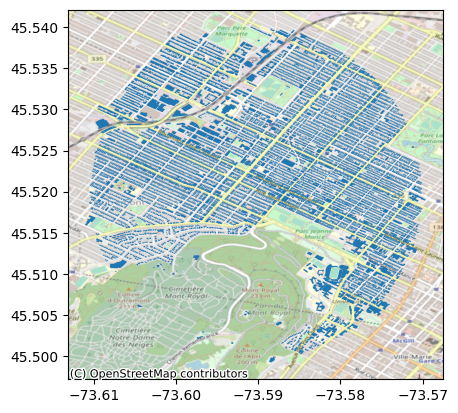

In [4]:
utilities.plot_it(data_building_fp)


In [36]:
data_building_lots=utilities.building_extract(x=-73.590266,y=45.519742, r=0.03)
data_building_lots.head()

Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 30029 buildings in 3333 m radius of point -73.590266,45.519742


borough_id  building_number  built_area  dwelling_number firstletter_apt  \
0      REM19             1250         253                1               0   
1      REM19             3577        2824                1               0   
2      REM19             2212         354                6               0   
3      REM19             2208         198                1               0   
4      REM19             2204         189                1               0   

                                                geom  index  land_area  \
0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...      0         34   
1  {'type': 'Polygon', 'crs': {'type': 'name', 'p...      5         76   
2  {'type': 'Polygon', 'crs': {'type': 'name', 'p...      8        178   
3  {'type': 'Polygon', 'crs': {'type': 'name', 'p...      9        173   
4  {'type': 'Polygon', 'crs': {'type': 'name', 'p...     10        166   

   landuse_code landuse_text lastletter_apt  max_floors  municipality_code  \
0          1000     Logement              0           0                 50   
1          1000     Logement              0           1                 50   
2          1000     Logement              0           3                 50   
3          1000     Logement              0           2                 50   
4          1000     Logement              0           2                 50   

        nad83_registration                                street_name  \
0  9840-22-7858-8-001-0103               avenue des Pins Ouest  (MTL)   
1  9739-83-9737-8-001-0302                  avenue Atwater  (MTL+WMT)   
2  9838-19-9094-8-000-0000  boulevard De Maisonneuve Ouest  (MTL+WMT)   
3  9838-19-9599-6-000-0000  boulevard De Maisonneuve Ouest  (MTL+WMT)   
4  9839-10-9905-2-000-0000  boulevard De Maisonneuve Ouest  (MTL+WMT)   

   street_number      uid unit_category unit_number  year_built  
0           1250  1038640   Condominium        1040        1979  
1           3577  1038232   Condominium        1214        1983  
2           2214  1037770      Régulier           0        1900  
3           2208  1037771      Régulier           0        1900  
4           2206  1037773      Régulier           0        1900

In [6]:
data_building_lots.columns

Index(['borough_id', 'building_number', 'built_area', 'dwelling_number',
       'firstletter_apt', 'geom', 'index', 'land_area', 'landuse_code',
       'landuse_text', 'lastletter_apt', 'max_floors', 'municipality_code',
       'nad83_registration', 'street_name', 'street_number', 'uid',
       'unit_category', 'unit_number', 'year_built'],
      dtype='object')

In [37]:
data_building_lots["landuse_code"]=data_building_lots["landuse_code"].astype("category")

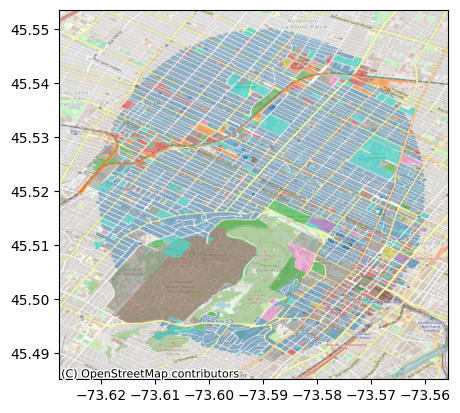

In [38]:
utilities.plot_it(buildings_list=data_building_lots,column="landuse_code",legend=False,alpha=0.5)

Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 11 tracts in 556 m radius of point -73.577702,45.529526


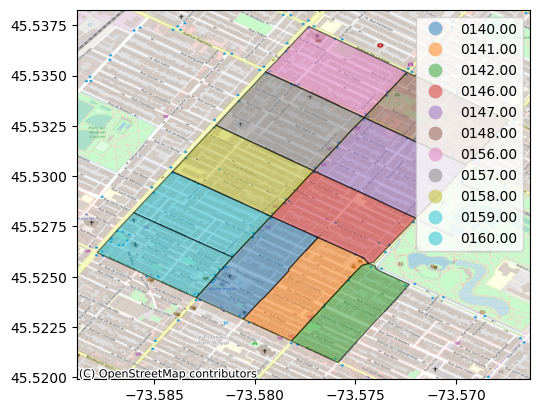

In [7]:
utilities.plot_it(utilities.tract_extract(x=-73.577702,y=45.529526, r=0.0050),multipolygon=True,column="CTNAME",legend=True,alpha=0.5)

In [78]:
bldg_success_list=pd.read_csv(r"C:\Users\msham\OneDrive\Documents\GitHub\PyCityLayers-OB-extension\bldg_success_list.csv")
bldg_success_list=bldg_success_list.rename({"PycityLayers Index":"index"},axis=1) #PycityLayers Index,Street_no,Postal_Code,Error_Code,Price,Consumption,City ID,Address
bldg_success_list["Price"]=bldg_success_list["Price"].apply(lambda x: x.replace(',',''))
bldg_success_list.astype({'Postal_Code': 'category',"Price":"int64"})
bldg_success_list


index  Street_no Postal_Code  Error_Code Price  Consumption    City ID  \
0     219467       4695     H2J 2V4           0  1750        17880  501408629   
1     171065       4170     H2L 3M8           0  1270        12960  502588431   
2      20022        759     H2J 1T8           0  1920        18850  503475167   
3     243369       4696     H2J 2T5           0  2330        22880  501405524   
4      86426       4403     H2J 3X7           0  1580        15630  500793080   
...      ...        ...         ...         ...   ...          ...        ...   
2628   19966        412     H2J 1J5           0   880         8600  502872993   
2629   19966        412     H2J 1J5           0  1090        10900  502872995   
2630   19966        412     H2J 1J5           0  1170        11980  502873510   
2631   19966        412     H2J 1J5           0  1210        11810  502873523   
2632   19966        412     H2J 1J5           0   390         2730  502872988   

                                             Address  
0               4695 rue Resther Montréal QC H2J 2V4  
1     4170 av du Parc-Lafontaine Montréal QC H2L 3M8  
2           759 rue de Bienville Montréal QC H2J 1T8  
3               4696 rue Pontiac Montréal QC H2J 2T5  
4             4403 rue Marquette Montréal QC H2J 3X7  
...                                              ...  
2628   2-412 boul Saint-Joseph E Montréal QC H2J 1J5  
2629   3-412 boul Saint-Joseph E Montréal QC H2J 1J5  
2630   4-412 boul Saint-Joseph E Montréal QC H2J 1J5  
2631   5-412 boul Saint-Joseph E Montréal QC H2J 1J5  
2632     412 boul Saint-Joseph E Montréal QC H2J 1J5  

[2633 rows x 8 columns]

In [77]:
px.scatter(x=bldg_success_list["index"],y=bldg_success_list["Consumption"])

In [80]:
mask=data_building_lots["index"].isin(bldg_success_list["index"])
mask
covered_bldgs=data_building_lots[mask]
len(covered_bldgs)

2076

2076


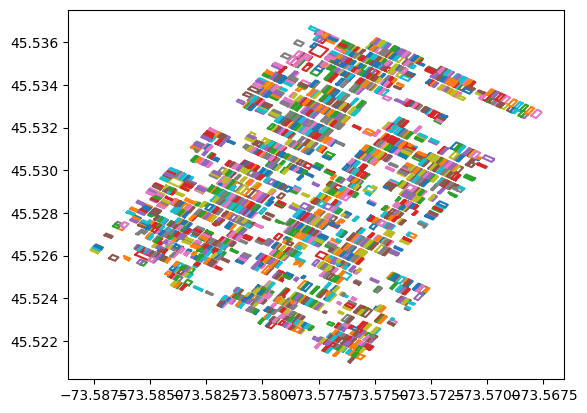

In [81]:
print(len(covered_bldgs))
for i in range(len(covered_bldgs)):
    vertex = covered_bldgs.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)


In [82]:
temp_df=bldg_success_list[["index","Consumption","Price"]]
temp_df["Consumption"]=temp_df["Consumption"].astype("int64")
temp_df["Price"]=temp_df["Price"].astype("int64")

# temp_df=temp_df.groupby(by="index",axis=0).sum()
new_df=pd.merge(temp_df,covered_bldgs,on="index")

C:\Users\msham\AppData\Local\Temp\ipykernel_28200\2373756834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Consumption"]=temp_df["Consumption"].astype("int64")
C:\Users\msham\AppData\Local\Temp\ipykernel_28200\2373756834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Price"]=temp_df["Price"].astype("int64")


In [83]:
new_df.shape

(2633, 22)

In [84]:
full_df=utilities.tract_assign(new_df,x=-73.577702,y=45.529526,r=0.02)


Fetching Metadata. Please Wait ...
Tracts collection acquired
selecting 79 tracts in 2222 m radius of point -73.577702,45.529526


c:\Users\msham\OneDrive\Documents\GitHub\PyCityLayers-OB-extension\utilities.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tract"][j]=tracts_assigned_dict[j]


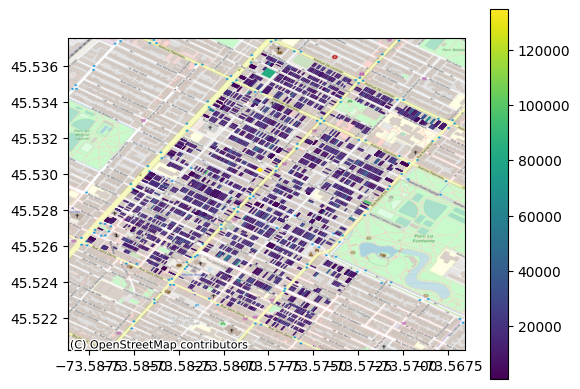

In [85]:
utilities.plot_it(full_df,column="Consumption",legend=True)

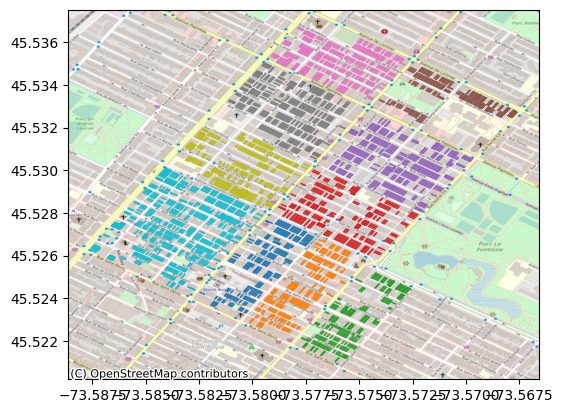

In [86]:
utilities.plot_it(full_df,column="Tract",legend=False)

In [45]:
full_df_res=full_df[full_df["landuse_code"]==1000]
full_df_res.shape

(2447, 23)

In [46]:
Plateau_tract_list=["0148.00","0140.00","0141.00","0142.00","0146.00","0147.00","0156.00","0157.00","0158.00","0159.00","0160.00"]
success_plateau=full_df_res[full_df_res["Tract"].isin(Plateau_tract_list)]
success_plateau.shape


(2447, 23)

In [47]:
temp_list=[]

for i,tract in enumerate(full_df_res["Tract"].unique()):
    temp_list.append({'Tract':tract,'# res':len(full_df_res[full_df_res["Tract"]==tract])})
tracts_count=pd.DataFrame(temp_list).sort_values(by = '# res',ascending=False).reset_index(drop=True)

In [49]:
tracts_count

Tract  # res
0   0157.00    301
1   0159.00    271
2   0146.00    260
3   0158.00    257
4   0147.00    251
5   0156.00    245
6   0160.00    232
7   0142.00    174
8   0141.00    168
9   0140.00    163
10  0148.00    125

# EXPLORE energy consumption variations in each tract... case study: tract 0159.00

In [48]:
Tract_0159=full_df_res[full_df_res["Tract"]=="0159.00"].reset_index(drop=True)

Tract_0159.shape

(271, 23)

In [50]:
Tract_0159.head()

index  Consumption  Price borough_id  building_number  built_area  \
0   16591        16260   1650      REM21             4682         164   
1   19652        30430   3230      REM21              812         208   
2  196780        12690   1220      REM21              830         133   
3   21790        30200   3200      REM21             4520         342   
4  222117        16250   1680      REM21             4685         293   

   dwelling_number firstletter_apt  \
0                1               0   
1                1               0   
2                2               0   
3                5               0   
4                3               0   

                                                geom  land_area  ...  \
0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        153  ...   
1  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        182  ...   
2  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        154  ...   
3  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        278  ...   
4  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        183  ...   

  max_floors municipality_code       nad83_registration  \
0          2                50  9843-20-9062-3-000-0000   
1          2                50  9842-39-5199-9-000-0000   
2          2                50  9843-11-8028-4-000-0000   
3          3                50  9843-51-5135-6-000-0000   
4          3                50  9843-31-0700-4-000-0000   

                       street_name  street_number      uid unit_category  \
0           rue Saint-André  (MTL)           4682  1025780      Régulier   
1          rue De Bienville  (MTL)            812  1027730      Régulier   
2               rue Gilford  (MTL)            832  1027799      Régulier   
3  avenue Christophe-Colomb  (MTL)           4528  1026419      Régulier   
4           rue Saint-André  (MTL)           4689  1026007      Régulier   

   unit_number  year_built    Tract  
0            0        1910  0159.00  
1            0        1900  0159.00  
2            0        1900  0159.00  
3            0        1910  0159.00  
4            0        1900  0159.00  

[5 rows x 23 columns]

In [59]:
footprints=utilities.building_footprint_extract(x=-73.579,y=45.525, r=0.0050)

Fetching Metadata. Please Wait ...
building lots collection acquired
selecting 2060 buildings in 556 m radius of point -73.579,45.525


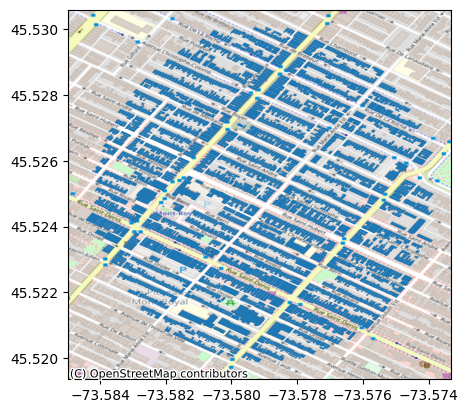

In [60]:
utilities.plot_it(footprints)

In [61]:
footprints.head()

bldg_category                                    bldg_id  \
0      Régulier  uuid_d4cef984-f291-4387-9468-951036bfa89c   
1      Régulier  uuid_612f59ee-c0bd-48b6-a1cd-eb16edd50ed7   
2      Régulier  uuid_0b95693e-45fe-498a-b1a5-94fd948a4f61   
3      Régulier  uuid_728a81ec-d747-4edd-8359-1082656b8bb4   
4      Régulier  uuid_f7b3b69b-25a4-41d5-bea3-6f837f23c766   

               bldg_name bldg_orig_id  built_year     fid  \
0  Le-Plateau-Mont-Royal      1203539        1900  191273   
1  Le-Plateau-Mont-Royal      1203601        1983  191291   
2  Le-Plateau-Mont-Royal      1203168        1910  191309   
3  Le-Plateau-Mont-Royal      1203572        1900  191310   
4  Le-Plateau-Mont-Royal     PC-27802        1900  191260   

                                                geom gml_lod  height_max  \
0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          11   
1  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          10   
2  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          14   
3  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          10   
4  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          16   

   height_mean   index ori_bldgID  shape_area  shape_len util_code   util_id  \
0    60.526053  191058    1203539   75.025572  37.998446      1000  01015410   
1    60.906849  191074    1203601   60.200743  32.308432      1000  01015176   
2    57.925637  191091    1203168   73.113485  36.355265      1000  01098090   
3    60.664911  191092    1203572   71.321878  35.587863      1000  01015184   
4    61.456167  191045   PC-27802  129.269682  57.932435      1000  01018200   

    util_label  
0  Residential  
1  Residential  
2  Residential  
3  Residential  
4  Residential

In [63]:
mask2=footprints["util_id"]
mask2

0       01015410
1       01015176
2       01098090
3       01015184
4       01018200
          ...   
2055    01027034
2056    01027044
2057    01027044
2058    01026749
2059    01026749
Name: util_id, Length: 2060, dtype: object

In [70]:
uid_list=[]
for i in Tract_0159["uid"]:
    # print(str("0"+str(i)))
    uid_list.append(str("0"+str(i)))


In [73]:
mask2=footprints["util_id"].isin(uid_list)
mask2.unique()

array([False,  True])

In [74]:
footprints[mask2]

bldg_category                                    bldg_id  \
1345      Régulier  uuid_08293008-ac0d-434d-a417-fb12b19ee6fc   
1346   Condominium  uuid_cfee248a-5177-4a34-b9c5-ff6cdbd1df81   
1352      Régulier  uuid_9a204b33-4c96-4153-91fe-99ec45db2353   
1353      Régulier  uuid_3ac42814-525b-4b75-8193-840ab9a40730   
1356      Régulier  uuid_23c4118d-e2ae-48d1-bad1-1d3ed544c00a   
...            ...                                        ...   
2024      Régulier  uuid_c6587b64-6500-4e4d-b3ba-dc23dbbfe2cf   
2025      Régulier  uuid_8141ec42-c4f0-4f2e-a315-bf0645e206c2   
2026      Régulier  uuid_8141ec42-c4f0-4f2e-a315-bf0645e206c2   
2033      Régulier  uuid_3152faf0-5c08-41b6-9de4-a1034da5eac8   
2034      Régulier  uuid_3152faf0-5c08-41b6-9de4-a1034da5eac8   

                  bldg_name bldg_orig_id  built_year     fid  \
1345  Le-Plateau-Mont-Royal      1444570        1900  200176   
1346  Le-Plateau-Mont-Royal      1444935        1900  200177   
1352  Le-Plateau-Mont-Royal      1444683        1910  200429   
1353  Le-Plateau-Mont-Royal      1444574        1900  200432   
1356  Le-Plateau-Mont-Royal      1444736        1910  200453   
...                     ...          ...         ...     ...   
2024  Le-Plateau-Mont-Royal      1444722        1910  201100   
2025  Le-Plateau-Mont-Royal      1444714        1910  201110   
2026  Le-Plateau-Mont-Royal      1444714        1910  201110   
2033  Le-Plateau-Mont-Royal      1444653        1910  201135   
2034  Le-Plateau-Mont-Royal      1444653        1910  201135   

                                                   geom gml_lod  height_max  \
1345  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          10   
1346  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          14   
1352  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          13   
1353  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          10   
1356  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          14   
...                                                 ...     ...         ...   
2024  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          13   
2025  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          14   
2026  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          14   
2033  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          18   
2034  {'type': 'Polygon', 'crs': {'type': 'name', 'p...    LoD2          18   

      height_mean   index ori_bldgID  shape_area  shape_len util_code  \
1345    57.824232  199400    1444570  122.576051  55.671650      1000   
1346    58.719057  199401    1444935  164.825666  63.092490      1000   
1352    56.832545  199642    1444683  108.280244  44.013044      1000   
1353    57.692865  199645    1444574  115.797675  55.863185      1000   
1356    56.389209  199665    1444736  141.231798  63.700012      1000   
...           ...     ...        ...         ...        ...       ...   
2024    56.005281  253189    1444722  144.840217  68.027708      1000   
2025    55.220845  253190    1444714  134.430438  68.076097      1000   
2026    55.220845  253191    1444714  134.430438  68.076097      1000   
2033    56.521975  253198    1444653  226.406257  92.296740      1000   
2034    56.521975  253199    1444653  226.406257  92.296740      1000   

       util_id   util_label  
1345  01025760  Residential  
1346  01116484  Residential  
1352  01026279  Residential  
1353  01025752  Residential  
1356  01026391  Residential  
...        ...          ...  
2024  01026445  Residential  
2025  01026425  Residential  
2026  01026425  Residential  
2033  01026272  Residential  
2034  01026272  Residential  

[140 rows x 17 columns]

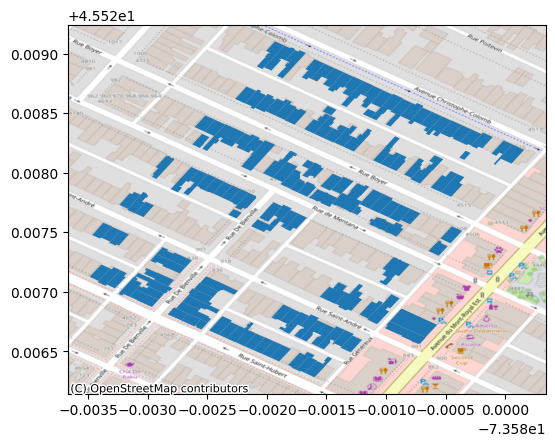

In [75]:
utilities.plot_it(footprints[mask2])

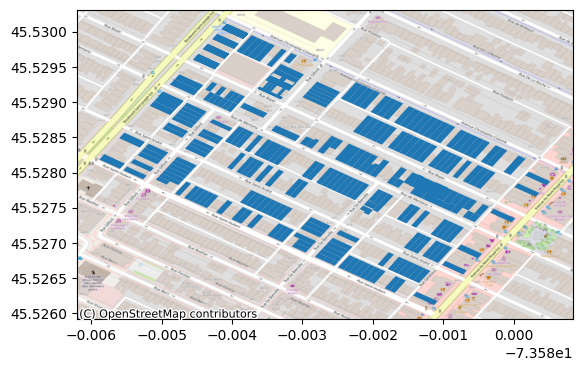

In [76]:
utilities.plot_it(Tract_0159)

In [222]:
temporary=Tract_0159.groupby("index",as_index=False).agg({"Consumption":"sum","Price":"sum"})
temporary=pd.merge(temporary,Tract_0159[["index","land_area"]].drop_duplicates(), on='index', how='left')
temporary

index  Consumption  Price  land_area
0       933        14510   1420        153
1      1495        22390   2250        232
2     10721        17700   1790        232
3     11580        18070   1830        232
4     13489        10370   1010        175
..      ...          ...    ...        ...
231  321298        14390   1400        186
232  322318        12540   1250        232
233  324013        20210   2050         92
234  330967        16460   1630        153
235  331149        13870   1410        229

[236 rows x 4 columns]

In [223]:
px.scatter(x=temporary["index"],y=temporary["Consumption"]/temporary["land_area"])

In [254]:
temporary_2=Tract_0159.groupby("index",as_index=False).agg({"Consumption":"sum","Price":"sum","land_area":"sum"})
temporary_2=pd.merge(temporary_2,Tract_0159[["index","dwelling_number"]].drop_duplicates(), on='index', how='left')
temporary_2

index  Consumption  Price  land_area  dwelling_number
0       933        14510   1420        153                1
1      1495        22390   2250        232                1
2     10721        17700   1790        232                4
3     11580        18070   1830        232                3
4     13489        10370   1010        175                2
..      ...          ...    ...        ...              ...
231  321298        14390   1400        186                3
232  322318        12540   1250        232                3
233  324013        20210   2050         92                1
234  330967        16460   1630        153                2
235  331149        13870   1410        229                3

[236 rows x 5 columns]

In [232]:
px.scatter(x=temporary_2["index"],y=temporary_2["Consumption"]/temporary_2["land_area"])

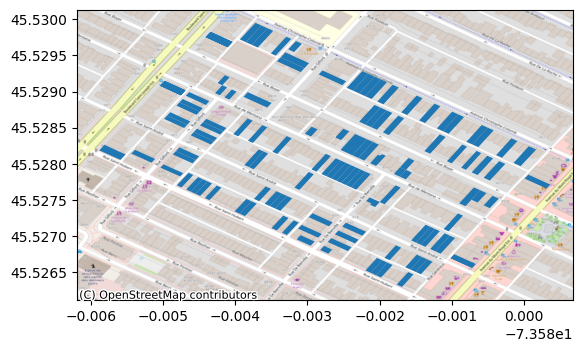

In [227]:
utilities.plot_it(Tract_0159[Tract_0159["index"]<50000])

In [236]:
item=Tract_0159[Tract_0159["index"]==24590]
item

index  Consumption  Price borough_id  building_number  built_area  \
87  24590        20030   2070      REM21             4747         736   

    dwelling_number firstletter_apt  \
87                1               0   

                                                 geom  land_area  ...  \
87  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         46  ...   

   max_floors municipality_code       nad83_registration  \
87          1                50  9843-10-8498-1-001-0001   

                street_name  street_number      uid unit_category  \
87  rue Saint-Hubert  (MTL)           4747  1119577   Condominium   

    unit_number  year_built    Tract  
87            0        1910  0159.00  

[1 rows x 23 columns]

In [244]:
Tract_0159_multiunit=Tract_0159[Tract_0159["dwelling_number"]>1]
Tract_0159_multiunit.head()

index  Consumption  Price borough_id  building_number  built_area  \
2  196780        12690   1220      REM21              830         133   
3   21790        30200   3200      REM21             4520         342   
4  222117        16250   1680      REM21             4685         293   
5   16675         8460    820      REM21             4664         389   
6   20812        18770   1880      REM21             1021         561   

   dwelling_number firstletter_apt  \
2                2               0   
3                5               0   
4                3               0   
5                3               0   
6                2               0   

                                                geom  land_area  ...  \
2  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        154  ...   
3  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        278  ...   
4  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        183  ...   
5  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        242  ...   
6  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        205  ...   

  max_floors municipality_code       nad83_registration  \
2          2                50  9843-11-8028-4-000-0000   
3          3                50  9843-51-5135-6-000-0000   
4          3                50  9843-31-0700-4-000-0000   
5          3                50  9843-42-0430-5-000-0000   
6          0                50  9843-50-6595-2-000-0000   

                       street_name  street_number      uid unit_category  \
2               rue Gilford  (MTL)            832  1027799      Régulier   
3  avenue Christophe-Colomb  (MTL)           4528  1026419      Régulier   
4           rue Saint-André  (MTL)           4689  1026007      Régulier   
5  avenue Christophe-Colomb  (MTL)           4668  1026466      Régulier   
6  avenue du Mont-Royal Est  (MTL)           1025  1027635      Régulier   

   unit_number  year_built    Tract  
2            0        1900  0159.00  
3            0        1910  0159.00  
4            0        1900  0159.00  
5            0        1910  0159.00  
6            0        1900  0159.00  

[5 rows x 23 columns]

In [249]:
px.scatter(x=Tract_0159_multiunit["index"],y=Tract_0159_multiunit["dwelling_number"])

In [255]:
temporary_2[temporary_2["dwelling_number"]==9]

index  Consumption  Price  land_area  dwelling_number
71    21017        14140   1410        441                9
158  223573        21260   2920       1953                9
222  313272        19160   1950        441                9

In [262]:
Tract_0159_multiunit[Tract_0159_multiunit["index"]==19674]

index  Consumption  Price borough_id  building_number  built_area  \
165  19674         1890    330      REM21              940         484   
166  19674         3310    440      REM21              940         484   
167  19674         1730    320      REM21              940         484   
168  19674         1800    320      REM21              940         484   

     dwelling_number firstletter_apt  \
165                5               0   
166                5               0   
167                5               0   
168                5               0   

                                                  geom  land_area  ...  \
165  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   
166  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   
167  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   
168  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   

    max_floors municipality_code       nad83_registration  \
165          3                50  9843-12-7140-6-000-0000   
166          3                50  9843-12-7140-6-000-0000   
167          3                50  9843-12-7140-6-000-0000   
168          3                50  9843-12-7140-6-000-0000   

                           street_name  street_number      uid unit_category  \
165  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   
166  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   
167  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   
168  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   

     unit_number  year_built    Tract  
165            0        1931  0159.00  
166            0        1931  0159.00  
167            0        1931  0159.00  
168            0        1931  0159.00  

[4 rows x 23 columns]

In [275]:
Tract_0159_multiunit[Tract_0159_multiunit["index"]==19674]["street_name"]

165    boulevard Saint-Joseph Est  (MTL)
166    boulevard Saint-Joseph Est  (MTL)
167    boulevard Saint-Joseph Est  (MTL)
168    boulevard Saint-Joseph Est  (MTL)
Name: street_name, dtype: object

In [281]:
st_joseph=Tract_0159_multiunit[Tract_0159_multiunit["street_name"]=="boulevard Saint-Joseph Est  (MTL)"]
st_joseph[st_joseph["street_number"]>900].sort_values(by="street_number").head()

index  Consumption  Price borough_id  building_number  built_area  \
267  305834        13600   1360      REM21              924         384   
17   251938        21040   2070      REM21              930         383   
168   19674         1800    320      REM21              940         484   
167   19674         1730    320      REM21              940         484   
166   19674         3310    440      REM21              940         484   

     dwelling_number firstletter_apt  \
267                4               0   
17                 5               0   
168                5               0   
167                5               0   
166                5               0   

                                                  geom  land_area  ...  \
267  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        236  ...   
17   {'type': 'Polygon', 'crs': {'type': 'name', 'p...        236  ...   
168  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   
167  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   
166  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        240  ...   

    max_floors municipality_code       nad83_registration  \
267          3                50  9843-12-6125-8-000-0000   
17           0                50  9843-12-6632-3-000-0000   
168          3                50  9843-12-7140-6-000-0000   
167          3                50  9843-12-7140-6-000-0000   
166          3                50  9843-12-7140-6-000-0000   

                           street_name  street_number      uid unit_category  \
267  boulevard Saint-Joseph Est  (MTL)            928  1027981      Régulier   
17   boulevard Saint-Joseph Est  (MTL)            936  1027982      Régulier   
168  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   
167  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   
166  boulevard Saint-Joseph Est  (MTL)            942  1027983      Régulier   

     unit_number  year_built    Tract  
267            0        1929  0159.00  
17             0        1929  0159.00  
168            0        1931  0159.00  
167            0        1931  0159.00  
166            0        1931  0159.00  

[5 rows x 23 columns]

In [292]:
tt=data_building_lots[data_building_lots["street_name"]=="boulevard Saint-Joseph Est  (MTL)"].sort_values(by="street_number")
tt[tt["street_number"]==942]

borough_id  building_number  built_area  dwelling_number firstletter_apt  \
4761      REM21              940         484                5               0   

                                                   geom  index  land_area  \
4761  {'type': 'Polygon', 'crs': {'type': 'name', 'p...  19674        240   

     landuse_code landuse_text lastletter_apt  max_floors  municipality_code  \
4761         1000     Logement              0           3                 50   

           nad83_registration                        street_name  \
4761  9843-12-7140-6-000-0000  boulevard Saint-Joseph Est  (MTL)   

      street_number      uid unit_category unit_number  year_built  
4761            942  1027983      Régulier           0        1931

C:\Users\msham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\contextily\tile.py:581: UserWarning:

The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 19).



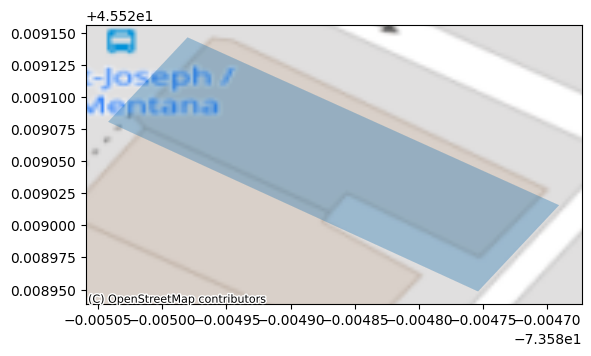

In [273]:
utilities.plot_it(Tract_0159_multiunit[Tract_0159_multiunit["index"]==19674].reset_index(drop=True),alpha=0.1)

In [218]:
for i in temporary.index:
    temporary[]

Consumption  Price
index                     
933           14510   1420
1495          22390   2250
10721         17700   1790
11580         18070   1830
13489         10370   1010
...             ...    ...
321298        14390   1400
322318        12540   1250
324013        20210   2050
330967        16460   1630
331149        13870   1410

[236 rows x 2 columns]

In [125]:
duplicated_list=Tract_0159[Tract_0159.duplicated("index")]['index']
duplicated_list.unique()

array([223573, 207448,  20006, 220017,  19674,  18184, 288494, 244616,
       258666], dtype=int64)

In [127]:
for i in duplicated_list.unique():
    print(i)

223573
207448
20006
220017
19674
18184
288494
244616
258666


In [172]:
dupliacte_indexes=pd.DataFrame([])

for i in duplicated_list.unique():
    temp_list=[]
    
    # print("Index is: ",i)
    # print("the length of the duplicate buildings is:",len(Tract_0159[Tract_0159["index"]==i]))
    k=1

    for j in range(len(Tract_0159)):
        # print(j)
        # print("i is:",i)
        # print("j is:",j)
        # print(Tract_0159["index"][j])
        if Tract_0159["index"][j]==i:
            temp_list.append(Tract_0159["Consumption"][j])
            k+=1
            # print(temp_list)
    dupliacte_indexes=pd.concat([pd.DataFrame(temp_list,columns=[i]),dupliacte_indexes],axis=1)
    # if i>1:
    #     break


dupliacte_indexes
    

258666  244616   288494   18184   19674    220017   20006    207448  223573
0   12650   12390   8570.0  16490.0  1890.0   9210.0  18180.0  10370.0    6250
1   19490   10910  10330.0  10080.0  3310.0   9850.0   4140.0  12310.0    3710
2    8010   11320  17520.0      NaN  1730.0  10610.0   7190.0   5350.0    2110
3    9470    8250      NaN      NaN  1800.0  14610.0   4700.0   7180.0    2750
4    7750    7370      NaN      NaN     NaN      NaN      NaN  10360.0    1910
5    9970    6460      NaN      NaN     NaN      NaN      NaN   4000.0    2390
6    7220   16330      NaN      NaN     NaN      NaN      NaN      NaN    2140

In [213]:
Tract_0159_sum=Tract_0159[["index","Consumption"]]
Tract_0159_sum["index"]=Tract_0159_sum["index"].astype("category")
Tract_0159_sum=Tract_0159_sum.groupby("index").sum()
Tract_0159_sum["land_area"]=



C:\Users\msham\AppData\Local\Temp\ipykernel_15416\2910492529.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
px.line(Tract_0159_sum)

In [216]:
Tract_0159[Tract_0159["index"]==258666]

index  Consumption  Price borough_id  building_number  built_area  \
255  258666        12650   1200      REM21             4584         325   
256  258666        19490   1970      REM21             4584         325   
257  258666         8010    800      REM21             4584         325   
258  258666         9470    950      REM21             4584         325   
259  258666         7750    770      REM21             4584         325   
260  258666         9970   1000      REM21             4584         325   
261  258666         7220    730      REM21             4584         325   

     dwelling_number firstletter_apt  \
255                6               0   
256                6               0   
257                6               0   
258                6               0   
259                6               0   
260                6               0   
261                6               0   

                                                  geom  land_area  ...  \
255  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   
256  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   
257  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   
258  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   
259  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   
260  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   
261  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        142  ...   

    max_floors municipality_code       nad83_registration       street_name  \
255          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   
256          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   
257          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   
258          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   
259          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   
260          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   
261          3                50  9843-41-4309-9-000-0000  rue Boyer  (MTL)   

     street_number      uid unit_category  unit_number  year_built    Tract  
255           4584  1026279      Régulier            0        1910  0159.00  
256           4584  1026279      Régulier            0        1910  0159.00  
257           4584  1026279      Régulier            0        1910  0159.00  
258           4584  1026279      Régulier            0        1910  0159.00  
259           4584  1026279      Régulier            0        1910  0159.00  
260           4584  1026279      Régulier            0        1910  0159.00  
261           4584  1026279      Régulier            0        1910  0159.00  

[7 rows x 23 columns]

In [208]:
Tract_0159_sum.groupby("index").sum()


Consumption
index              
933           14510
1495          22390
10721         17700
11580         18070
13489         10370
...             ...
321298        14390
322318        12540
324013        20210
330967        16460
331149        13870

[236 rows x 1 columns]

In [204]:
for i in range(len(Tract_0159)):
    if 
    print(Tract_0159.Consumption[i])

16260
30430
12690
30200
16250
8460
18770
13730
18510
14280
20320
13040
21000
8280
22390
27250
5380
21040
13620
5460
22860
5620
1590
6250
3710
2110
2750
1910
2390
2140
11950
25050
10370
12310
5350
7180
10360
4000
13530
21610
5540
20130
13720
17430
28480
14000
20640
14470
10960
33390
12040
24230
22230
15520
10370
20590
9650
12830
7470
16080
18180
4140
7190
4700
18950
23920
14090
13650
6110
20050
14490
7320
17970
7080
32110
8100
19480
14410
2510
15750
17700
14170
16130
9640
8940
12140
15050
20030
25480
11350
20080
16930
13210
27980
1740
22540
18150
10750
16290
21860
19820
23900
11830
9570
20820
26540
14140
34970
15520
23610
9210
9850
10610
14610
7490
4740
21550
29870
7880
13660
31630
13130
6690
11660
5000
10300
17640
13310
17920
11310
5900
12720
14640
20120
37340
32230
15900
17750
10680
5400
14950
23230
10170
17850
13960
12160
25630
8630
14340
11070
10760
11930
14510
19860
17290
14680
7780
5550
11440
8840
11800
31250
7500
15430
26890
1890
3310
1730
1800
8870
12220
12920
11340
17500
37100


In [195]:
# aggregate for each index
Tract_0159_sum=Tract_0159.copy()
Tract_0159_sum["Consumption"]=Tract_0159.groupby(by="index",axis=0).sum()["Consumption"]
Tract_0159_sum

C:\Users\msham\AppData\Local\Temp\ipykernel_15416\73899415.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



index  Consumption  Price borough_id  building_number  built_area  \
0     16591          NaN   1650      REM21             4682         164   
1     19652          NaN   3230      REM21              812         208   
2    196780          NaN   1220      REM21              830         133   
3     21790          NaN   3200      REM21             4520         342   
4    222117          NaN   1680      REM21             4685         293   
..      ...          ...    ...        ...              ...         ...   
266  175253          NaN   1450      REM21             4516         188   
267  305834          NaN   1360      REM21              924         384   
268  234814          NaN   1880      REM21              837         316   
269  231596          NaN   2680      REM21             4854         134   
270  324013          NaN   2050      REM21             4557           0   

     dwelling_number firstletter_apt  \
0                  1               0   
1                  1               0   
2                  2               0   
3                  5               0   
4                  3               0   
..               ...             ...   
266                1               0   
267                4               0   
268                5               0   
269                1               0   
270                1               0   

                                                  geom  land_area  ...  \
0    {'type': 'Polygon', 'crs': {'type': 'name', 'p...        153  ...   
1    {'type': 'Polygon', 'crs': {'type': 'name', 'p...        182  ...   
2    {'type': 'Polygon', 'crs': {'type': 'name', 'p...        154  ...   
3    {'type': 'Polygon', 'crs': {'type': 'name', 'p...        278  ...   
4    {'type': 'Polygon', 'crs': {'type': 'name', 'p...        183  ...   
..                                                 ...        ...  ...   
266  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        174  ...   
267  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        236  ...   
268  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        191  ...   
269  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         88  ...   
270  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         92  ...   

    max_floors municipality_code       nad83_registration  \
0            2                50  9843-20-9062-3-000-0000   
1            2                50  9842-39-5199-9-000-0000   
2            2                50  9843-11-8028-4-000-0000   
3            3                50  9843-51-5135-6-000-0000   
4            3                50  9843-31-0700-4-000-0000   
..         ...               ...                      ...   
266          2                50  9842-49-4860-6-000-0000   
267          3                50  9843-12-6125-8-000-0000   
268          3                50  9843-30-3543-7-000-0000   
269          2                50  9843-22-1559-2-000-0000   
270          1                50  9842-39-7775-4-001-0001   

                           street_name  street_number      uid unit_category  \
0               rue Saint-André  (MTL)           4682  1025780      Régulier   
1              rue De Bienville  (MTL)            812  1027730      Régulier   
2                   rue Gilford  (MTL)            832  1027799      Régulier   
3      avenue Christophe-Colomb  (MTL)           4528  1026419      Régulier   
4               rue Saint-André  (MTL)           4689  1026007      Régulier   
..                                 ...            ...      ...           ...   
266             rue Saint-André  (MTL)           4516  1025746      Régulier   
267  boulevard Saint-Joseph Est  (MTL)            928  1027981      Régulier   
268            rue De Bienville  (MTL)            839  1027744      Régulier   
269                   rue Boyer  (MTL)           4854  1026315      Régulier   
270            rue Saint-Hubert  (MTL)           4557  5283069   Condominium   

     unit_number  year_built    Tract  
0

In [191]:
Tract_0159_sum.index.astype("category")

CategoricalIndex([   933,   1495,  10721,  11580,  13489,  13490,  13717,
                   13941,  15475,  15870,
                  ...
                  317564, 317911, 319062, 319195, 320504, 321298, 322318,
                  324013, 330967, 331149],
                 categories=[933, 1495, 10721, 11580, ..., 322318, 324013, 330967, 331149], ordered=False, dtype='category', name='index', length=236)

In [187]:
px.scatter(x=Tract_0159_sum.index,y=Tract_0159_sum["Consumption"])

In [192]:
px.scatter(x=Tract_0159_sum.index.astype("category"),y=Tract_0159_sum["Consumption"]/Tract_0159_sum["land_area"])

<Axes: >

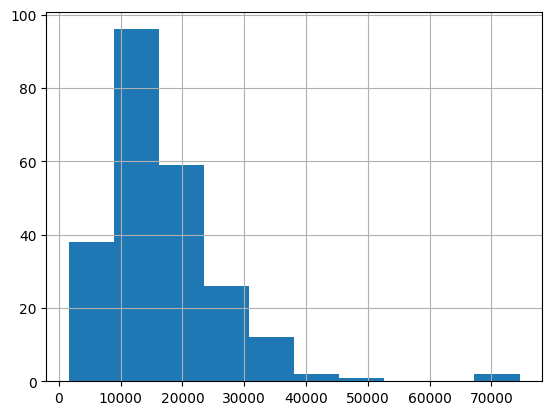

In [188]:
Tract_0159_sum["Consumption"].hist()

In [153]:
pd.DataFrame(temp_list,columns=["i"])

i
0  223573
1    6250
2    3710
3    2110
4    2750
5    1910
6    2390
7    2140

In [151]:
pd.DataFrame(temp_list)

0
0  223573
1    6250
2    3710
3    2110
4    2750
5    1910
6    2390
7    2140

In [144]:
temp_list

[{'index': 223573},
 {1: 6250},
 {2: 3710},
 {3: 2110},
 {4: 2750},
 {5: 1910},
 {6: 2390},
 {7: 2140}]

In [167]:
dupliacte_indexes.transpose()

0        1        2        3        4       5        6
258666  12650.0  19490.0   8010.0   9470.0   7750.0  9970.0   7220.0
244616  12390.0  10910.0  11320.0   8250.0   7370.0  6460.0  16330.0
288494   8570.0  10330.0  17520.0      NaN      NaN     NaN      NaN
18184   16490.0  10080.0      NaN      NaN      NaN     NaN      NaN
19674    1890.0   3310.0   1730.0   1800.0      NaN     NaN      NaN
220017   9210.0   9850.0  10610.0  14610.0      NaN     NaN      NaN
20006   18180.0   4140.0   7190.0   4700.0      NaN     NaN      NaN
207448  10370.0  12310.0   5350.0   7180.0  10360.0  4000.0      NaN
223573   6250.0   3710.0   2110.0   2750.0   1910.0  2390.0   2140.0

In [169]:
px.line(dupliacte_indexes)

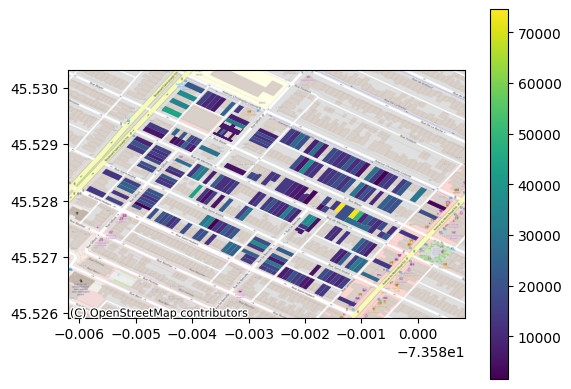

In [35]:
utilities.plot_it(Tract_0159,column="Consumption",legend=True)

In [21]:
Tract_0159

index  Consumption borough_id  building_number  built_area  \
9        933        14510      REM21             4551         170   
15      1495        22390      REM21             4544         189   
118    10721        17700      REM21             4602         296   
140    11580        18070      REM21             4640         314   
172    13489        10370      REM21             4541         177   
...      ...          ...        ...              ...         ...   
1898  321298        14390      REM21             4569         236   
1903  322318        12540      REM21             4605         307   
1909  324013        20210      REM21             4557           0   
1948  330967        16460      REM21             4534         228   
1949  331149        13870      REM21              921         465   

      dwelling_number firstletter_apt  \
9                   1               0   
15                  1               0   
118                 4               0   
140                 3               0   
172                 2               0   
...               ...             ...   
1898                3               0   
1903                3               0   
1909                1               0   
1948                2               0   
1949                3               0   

                                                   geom  land_area  \
9     {'type': 'Polygon', 'crs': {'type': 'name', 'p...        153   
15    {'type': 'Polygon', 'crs': {'type': 'name', 'p...        232   
118   {'type': 'Polygon', 'crs': {'type': 'name', 'p...        232   
140   {'type': 'Polygon', 'crs': {'type': 'name', 'p...        232   
172   {'type': 'Polygon', 'crs': {'type': 'name', 'p...        175   
...                                                 ...        ...   
1898  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        186   
1903  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        232   
1909  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         92   
1948  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        153   
1949  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        229   

     landuse_code  ... max_floors municipality_code       nad83_registration  \
9            1000  ...          2                50  9842-39-8867-8-000-0000   
15           1000  ...          2                50  9843-51-3247-1-000-0000   
118          1000  ...          3                50  9843-41-6888-0-000-0000   
140          1000  ...          3                50  9843-42-2913-8-000-0000   
172          1000  ...          2                50  9843-40-3915-6-000-0000   
...           ...  ...        ...               ...                      ...   
1898         1000  ...          3                50  9843-41-8335-0-000-0000   
1903         1000  ...          3                50  9843-41-4857-7-000-0000   
1909         1000  ...          1                50  9842-39-7775-4-001-0001   
1948         1000  ...          2                50  9842-49-2575-2-000-0000   
1949         1000  ...          3                50  9842-59-0199-2-000-0000   

                          street_name street_number      uid  unit_category  \
9             rue Saint-Hubert  (MTL)          4551  1025728       Régulier   
15    avenue Christophe-Colomb  (MTL)          4544  1026425       Régulier   
118   avenue Christophe-Colomb  (MTL)          4608  1026445       Régulier   
140   avenue Christophe-Colomb  (MTL)          4644  1026458       Régulier   
172            rue Saint-André  (MTL)          4543  1026050       Régulier   
...                               ...           ...      ...            ...   
1898                 rue Boyer  (MTL)          4573  1026401       Régulier   
1903                 rue Boyer  (MTL)          4609  1026389       Régulier   
1909          rue Saint-Hubert  (MTL)          4557  5283069    Condominium   
1948           rue Saint-André  (MTL)          4536  1025754       Régulier   
1949  avenue d

In [76]:
Tract_363=full_df_res[full_df_res["Tract"]=="0363.00"]
Tract_363.head()

index  Value($) borough_id  building_number  built_area  dwelling_number  \
13     401      6250      REM05              325         188                1   
72    2103      1210      REM05             5506         152                1   
152   4236      1900      REM05              261         168                1   
163   4436       470      REM05             5640         232                2   
275  11716      3780      REM05             1060         344                1   

    firstletter_apt                                               geom  \
13                0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
72                0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
152               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
163               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
275               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   

     land_area landuse_code  ... max_floors municipality_code  \
13         222         1000  ...          2                50   
72         193         1000  ...          2                50   
152        248         1000  ...          2                50   
163        232         1000  ...          2                50   
275         34         1000  ...          1                50   

          nad83_registration                        street_name street_number  \
13   9642-70-3576-9-000-0000           avenue Bloomfield  (OUT)           325   
72   9642-72-4981-6-000-0000             avenue Durocher  (OUT)          5506   
152  9642-91-0447-2-000-0000              avenue Querbes  (OUT)           261   
163  9642-64-5044-9-000-0000           rue Hutchison  (MTL+OUT)          5642   
275  9742-00-6978-9-001-0007  avenue Fairmount Ouest  (MTL+OUT)          1060   

         uid  unit_category  unit_number year_built    Tract  
13   3030337       Régulier            0       1912  0363.00  
72   3032970       Régulier            0       1908  0363.00  
152  3033824       Régulier            0       1911  0363.00  
163  3033462       Régulier            0       1911  0363.00  
275  5065716    Condominium            6       1911  0363.00  

[5 rows x 22 columns]

<Axes: >

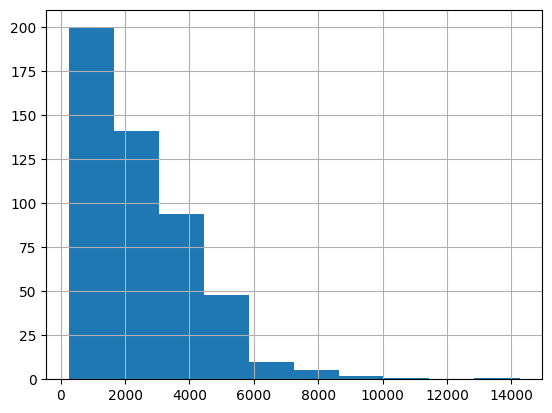

In [78]:
Tract_363["Value($)"].hist()

In [88]:
Tract_363_copy=Tract_363.copy()
Tract_363_copy["Total_area"]=Tract_363_copy["land_area"]*Tract_363_copy["max_floors"]
Tract_363_copy["cost_per_area"]=Tract_363_copy["Value($)"]/Tract_363_copy["Total_area"]
Tract_363_copy.head()

index  Value($) borough_id  building_number  built_area  dwelling_number  \
13     401      6250      REM05              325         188                1   
72    2103      1210      REM05             5506         152                1   
152   4236      1900      REM05              261         168                1   
163   4436       470      REM05             5640         232                2   
275  11716      3780      REM05             1060         344                1   

    firstletter_apt                                               geom  \
13                0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
72                0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
152               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
163               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
275               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   

     land_area landuse_code  ...       nad83_registration  \
13         222         1000  ...  9642-70-3576-9-000-0000   
72         193         1000  ...  9642-72-4981-6-000-0000   
152        248         1000  ...  9642-91-0447-2-000-0000   
163        232         1000  ...  9642-64-5044-9-000-0000   
275         34         1000  ...  9742-00-6978-9-001-0007   

                           street_name  street_number      uid unit_category  \
13            avenue Bloomfield  (OUT)            325  3030337      Régulier   
72              avenue Durocher  (OUT)           5506  3032970      Régulier   
152              avenue Querbes  (OUT)            261  3033824      Régulier   
163           rue Hutchison  (MTL+OUT)           5642  3033462      Régulier   
275  avenue Fairmount Ouest  (MTL+OUT)           1060  5065716   Condominium   

    unit_number  year_built    Tract Total_area cost_per_area  
13            0        1912  0363.00        444     14.076577  
72            0        1908  0363.00        386      3.134715  
152           0        1911  0363.00        496      3.830645  
163           0        1911  0363.00        464      1.012931  
275           6        1911  0363.00         34    111.176471  

[5 rows x 24 columns]

In [95]:
Tract_363_copy[Tract_363_copy["max_floors"]==0]

index  Value($) borough_id  building_number  built_area  \
1785  213831      1050      REM05             5642           0   
1801  219414      1700      REM05             5368           0   
1893  249464      5310      REM05              143         312   
2121  324086       310      REM05             5773         193   

      dwelling_number firstletter_apt  \
1785                1               0   
1801                1               0   
1893                1               0   
2121                1               0   

                                                   geom  land_area  \
1785  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        167   
1801  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         68   
1893  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        574   
2121  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        232   

     landuse_code  ...       nad83_registration  \
1785         1000  ...  9642-63-2660-7-001-0003   
1801         1000  ...  9642-92-3068-1-001-0003   
1893         1000  ...  9741-38-3225-0-000-0000   
2121         1000  ...  9642-54-2977-4-000-0000   

                                        street_name  street_number      uid  \
1785                         avenue Durocher  (OUT)           5642  5231787   
1801                       rue Hutchison  (MTL+OUT)           5368  5168857   
1893  chemin de la Côte-Sainte-Catherine  (MTL+OUT)            143  3039215   
2121                         avenue Durocher  (OUT)           5773  3033028   

     unit_category unit_number  year_built    Tract Total_area cost_per_area  
1785   Condominium           0        1950  0363.00          0           inf  
1801   Condominium           0        1910  0363.00          0           inf  
1893      Régulier           0        1898  0363.00          0           inf  
2121      Régulier           0        1913  0363.00          0           inf  

[4 rows x 24 columns]

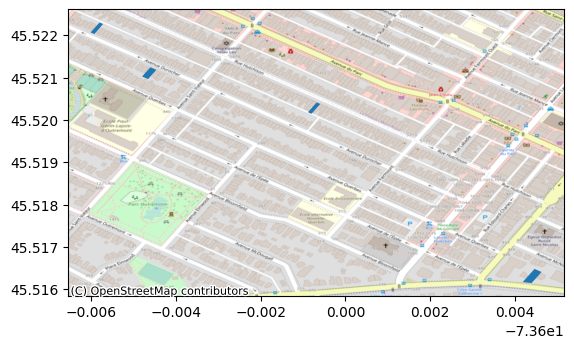

In [96]:
utilities.plot_it(Tract_363_copy[Tract_363_copy["max_floors"]==0])

In [103]:
Tract_363_copy["max_floors"].unique()

array([2, 1, 3, 0], dtype=int64)

In [108]:
Tract_363_copy[Tract_363_copy["max_floors"]==1].head()

index  Value($) borough_id  building_number  built_area  \
275    11716      3780      REM05             1060         344   
491    17662       940      REM05               18         181   
1256   91626       350      REM05              470           0   
1321  105796      1250      REM05              147         289   
1367  112162      9870      REM05             1090         222   

      dwelling_number firstletter_apt  \
275                 1               0   
491                 1               0   
1256                1               0   
1321                1               0   
1367                1               0   

                                                   geom  land_area  \
275   {'type': 'Polygon', 'crs': {'type': 'name', 'p...         34   
491   {'type': 'Polygon', 'crs': {'type': 'name', 'p...         53   
1256  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        119   
1321  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         89   
1367  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         33   

     landuse_code  ...       nad83_registration  \
275          1000  ...  9742-00-6978-9-001-0007   
491          1000  ...  9741-29-0204-7-001-0002   
1256         1000  ...  9741-48-9241-0-001-0003   
1321         1000  ...  9742-10-1213-5-001-0002   
1367         1000  ...  9742-00-5250-4-001-0009   

                            street_name  street_number      uid unit_category  \
275   avenue Fairmount Ouest  (MTL+OUT)           1060  5065716   Condominium   
491               avenue Querbes  (OUT)             18  3116112   Condominium   
1256           avenue Villeneuve  (OUT)            470  5247135   Condominium   
1321              avenue Querbes  (OUT)            147  3113770   Condominium   
1367  avenue Fairmount Ouest  (MTL+OUT)           1090  3033304   Condominium   

     unit_number  year_built    Tract Total_area cost_per_area  
275            6        1911  0363.00         34    111.176471  
491            0        1908  0363.00         53     17.735849  
1256           0        1913  0363.00        119      2.941176  
1321           0        1990  0363.00         89     14.044944  
1367           5        9999  0363.00         33    299.090909  

[5 rows x 24 columns]

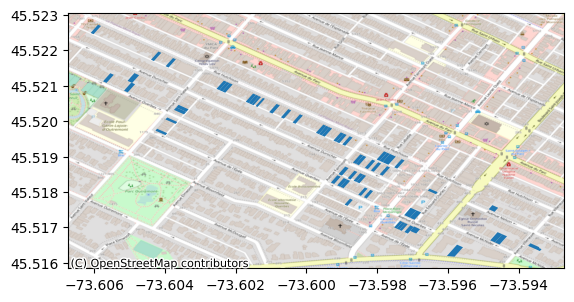

In [106]:
utilities.plot_it(Tract_363_copy[Tract_363_copy["max_floors"]==1])

In [93]:
Tract_363_copy[Tract_363_copy["Total_area"]==0]

index  Value($) borough_id  building_number  built_area  \
1785  213831      1050      REM05             5642           0   
1801  219414      1700      REM05             5368           0   
1893  249464      5310      REM05              143         312   
2121  324086       310      REM05             5773         193   

      dwelling_number firstletter_apt  \
1785                1               0   
1801                1               0   
1893                1               0   
2121                1               0   

                                                   geom  land_area  \
1785  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        167   
1801  {'type': 'Polygon', 'crs': {'type': 'name', 'p...         68   
1893  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        574   
2121  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        232   

     landuse_code  ...       nad83_registration  \
1785         1000  ...  9642-63-2660-7-001-0003   
1801         1000  ...  9642-92-3068-1-001-0003   
1893         1000  ...  9741-38-3225-0-000-0000   
2121         1000  ...  9642-54-2977-4-000-0000   

                                        street_name  street_number      uid  \
1785                         avenue Durocher  (OUT)           5642  5231787   
1801                       rue Hutchison  (MTL+OUT)           5368  5168857   
1893  chemin de la Côte-Sainte-Catherine  (MTL+OUT)            143  3039215   
2121                         avenue Durocher  (OUT)           5773  3033028   

     unit_category unit_number  year_built    Tract Total_area cost_per_area  
1785   Condominium           0        1950  0363.00          0           inf  
1801   Condominium           0        1910  0363.00          0           inf  
1893      Régulier           0        1898  0363.00          0           inf  
2121      Régulier           0        1913  0363.00          0           inf  

[4 rows x 24 columns]

ValueError: supplied range of [0.2222222222222222, inf] is not finite

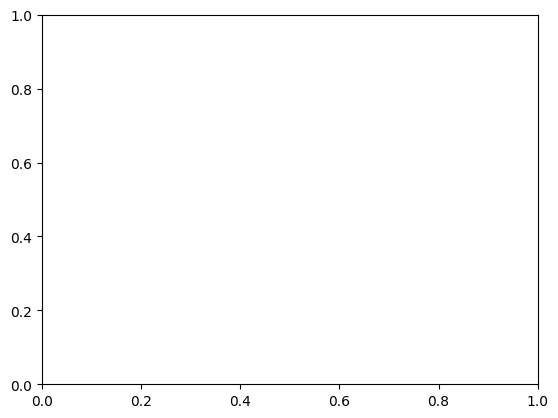

In [87]:
Tract_363_copy["cost_per_area"].hist()

## ERROR ANALYSIS

In [40]:
bldg_black_list=pd.read_csv(r"C:\Users\msham\OneDrive\Documents\GitHub\hydro-quebec-scrapper\bldg_black_list.csv")
bldg_black_list


BLDG Index  Civic_no Postal_Code  Error_Code  \
0         18683      4525     H2J 2L4           1   
1         16481       937     H2J 2B2           1   
2         20595      4671     H2J 1V2           1   
3         10836      4255     H2J 2K9           1   
4         15468      1330     H2J 1Y5           1   
..          ...       ...         ...         ...   
656       28075      4693     H2J 1P6           1   
657      246725      4391     H2J 2R2  4294967295   
658      274527      4699     H2J 3P7           1   
659      246594      4081     H2L 4X5           1   
660      148733       774     H2J 1K2  4294967295   

                                           Error_desc.  
0    b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
1    b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
2    b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
3    b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
4    b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
..                                                 ...  
656  b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
657  b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n T...  
658  b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
659  b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...  
660  b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n E...  

[661 rows x 5 columns]

In [54]:
error_list=[]
for i, error in enumerate(bldg_black_list["Error_desc."].unique()):
    # print(i)
    # print(len(bldg_black_list[bldg_black_list["Error_desc."]==error]))
    error_list.append({"ERROR":str(error),"LENGHT":len(bldg_black_list[bldg_black_list["Error_desc."]==error])})
Error_df=pd.DataFrame(error_list).sort_values(by = 'LENGHT',ascending=False).reset_index(drop=True)
print(len(Error_df))

20


In [57]:
display(Error_df)

ERROR  LENGHT
0   b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...     241
1   b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...     164
2   b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n T...      81
3   b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...      70
4   b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...      23
5   b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...      19
6   b"\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n T...      14
7   b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...      13
8   b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n E...       9
9   b"C:\\Users\\msham\\OneDrive\\Documents\\GitHu...       9
10  b"\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n T...       6
11  b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n E...       3
12  b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...       2
13  b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...       1
14  b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...       1
15  b"ERROR: The process with PID 21784 (child pro...       1
16  b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n T...       1
17  b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n P...       1
18  b'\x1bFAILED TO SOLVE CAPTCHA\x1b[m:\n E...       1
19  b'C:\\Users\\msham\\OneDrive\\Documents\\GitHu...       1

In [56]:
Error_df["ERROR"][0]

'b"C:\\\\Users\\\\msham\\\\OneDrive\\\\Documents\\\\GitHub\\\\hydro-quebec-scrapper\\\\node_modules\\\\puppeteer-core\\\\lib\\\\cjs\\\\puppeteer\\\\common\\\\ExecutionContext.js:252\\r\\n        throw new Error(\'Evaluation failed: \' + (0, util_js_1.getExceptionMessage)(exceptionDetails));\\r\\n              ^\\r\\n\\r\\nError: Evaluation failed: DOMException: Failed to execute \'querySelectorAll\' on \'Document\': \'#\' is not a valid selector.\\r\\n    at re (pptr://__puppeteer_evaluation_script__:3:12165)\\r\\n    at Ie (pptr://__puppeteer_evaluation_script__:3:12473)\\r\\n    at pptr://__puppeteer_evaluation_script__:2:12\\r\\n    at ExecutionContext._ExecutionContext_evaluate (C:\\\\Users\\\\msham\\\\OneDrive\\\\Documents\\\\GitHub\\\\hydro-quebec-scrapper\\\\node_modules\\\\puppeteer-core\\\\lib\\\\cjs\\\\puppeteer\\\\common\\\\ExecutionContext.js:252:15)\\r\\n    at process.processTicksAndRejections (node:internal/process/task_queues:95:5)\\r\\n    at async CDPJSHandle.evaluate

In [220]:
full_df_res["Tract"].isnull().values.any()

True

Empty DataFrame
Columns: [index, Value($), borough_id, building_number, built_area, dwelling_number, firstletter_apt, geom, land_area, landuse_code, landuse_text, lastletter_apt, max_floors, municipality_code, nad83_registration, street_name, street_number, uid, unit_category, unit_number, year_built, Tract]
Index: []

[0 rows x 22 columns]

In [ ]:
utilities.buildings_in_tracts(query_point_x=-73.600770,query_point_y=45.519859, query_radius=0.005)

In [14]:
temp_dict=dict([])
for tract in full_df["Tract"].unique():
    print(tract)
    temp_dict[tract]=len(full_df[full_df["Tract"]==tract])

temp_dict

0363.00
0165.00
0168.00


{'0363.00': 245, '0165.00': 43, '0168.00': 5}

In [13]:
full_df["Tract"].unique()

array(['0363.00', '0165.00', '0168.00'], dtype=object)

In [15]:
full_df[full_df["Tract"]=="0363.00"].head()

index  Value($) borough_id  building_number  built_area  dwelling_number  \
0    4236      1900      REM05              261         168                1   
1   11716      3780      REM05             1060         344                1   
23  50025       930      REM05              257         190                1   
24  54013      3510      REM05             5254         213                1   
25  60861       820      REM05             5372         342                3   

   firstletter_apt                                               geom  \
0                0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
1                0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
23               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
24               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   
25               0  {'type': 'Polygon', 'crs': {'type': 'name', 'p...   

    land_area landuse_code  ... max_floors municipality_code  \
0         248         1000  ...          2                50   
1          34         1000  ...          1                50   
23        223         1000  ...          2                50   
24        244         1000  ...          2                50   
25        208         1000  ...          3                50   

         nad83_registration                        street_name street_number  \
0   9642-91-0447-2-000-0000              avenue Querbes  (OUT)           261   
1   9742-00-6978-9-001-0007  avenue Fairmount Ouest  (MTL+OUT)          1060   
23  9642-90-2848-1-000-0000           avenue de l' Épée  (OUT)           257   
24  9642-91-9426-7-000-0000             avenue Durocher  (OUT)          5254   
25  9642-92-2372-8-000-0000           rue Hutchison  (MTL+OUT)          5376   

        uid  unit_category  unit_number year_built    Tract  
0   3033824       Régulier            0       1911  0363.00  
1   5065716    Condominium            6       1911  0363.00  
23  3030803       Régulier            0       1922  0363.00  
24  3032897       Régulier            0       1963  0363.00  
25  3033395       Régulier            0       1925  0363.00  

[5 rows x 22 columns]

In [58]:
full_df["Value($)"].describe()

count      292.000000
mean      2495.513699
std       1873.902174
min        260.000000
25%       1002.500000
50%       2060.000000
75%       3522.500000
max      14250.000000
Name: Value($), dtype: float64

In [59]:
full_df[full_df["Value($)"]==260.000000]

index  Value($) borough_id  building_number  built_area  \
231  269467       260      REM21             5293         454   

     dwelling_number firstletter_apt  \
231                3               0   

                                                  geom  land_area  \
231  {'type': 'Polygon', 'crs': {'type': 'name', 'p...        257   

    landuse_code  ... max_floors municipality_code       nad83_registration  \
231         1000  ...          3                50  9742-02-0876-7-000-0000   

                  street_name street_number      uid  unit_category  \
231  rue Hutchison  (MTL+OUT)          5297  1028179       Régulier   

     unit_number year_built    Tract  
231            0       1900  0165.00  

[1 rows x 22 columns]